In [1]:
import matplotlib.pyplot as plt

import lecture3.training_data as td
from lecture3.model import MakemoreModel

%matplotlib inline

In [2]:
print("training examples:", len(td.Y_train))
print("dev examples:", len(td.Y_dev))
print("test examples:", len(td.Y_test))
print("Total parameters:", sum([param.numel() for param in MakemoreModel().params]))


training examples: 182546
dev examples: 22840
test examples: 22760
Total parameters: 8108


Training Initial model...
Initial model Loss after 5000 rounds: 2.4139084815979004
Training Less overconfident model...
Less overconfident model Loss after 5000 rounds: 2.3362672328948975
Training Desaturated tanh model...
Desaturated tanh model Loss after 5000 rounds: 2.3800947666168213
Training Final model...
Final model Loss after 5000 rounds: 2.336920976638794


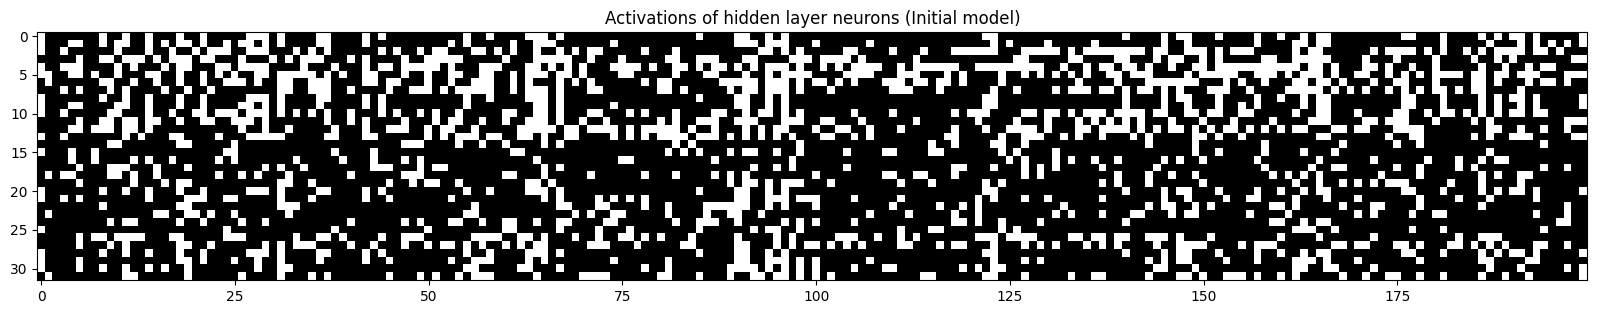

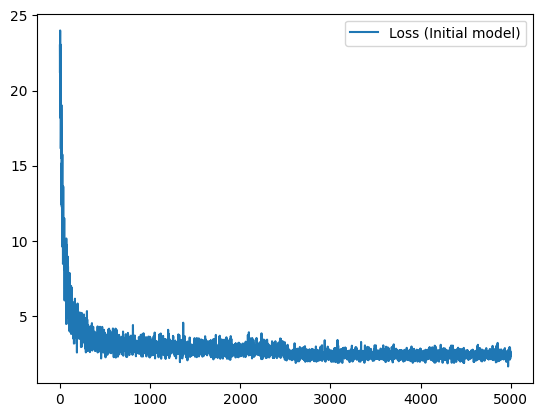

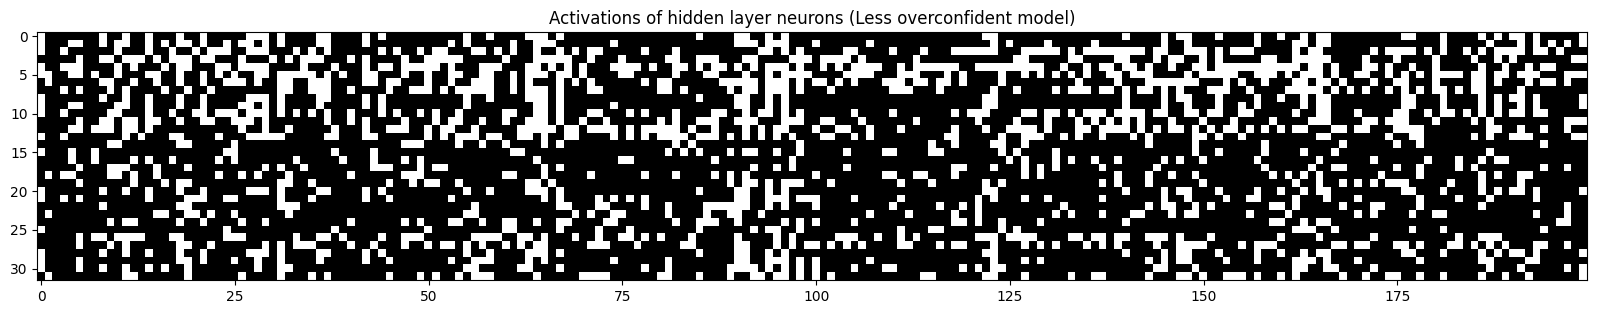

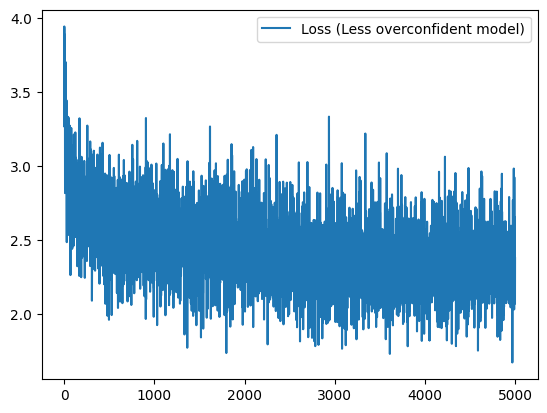

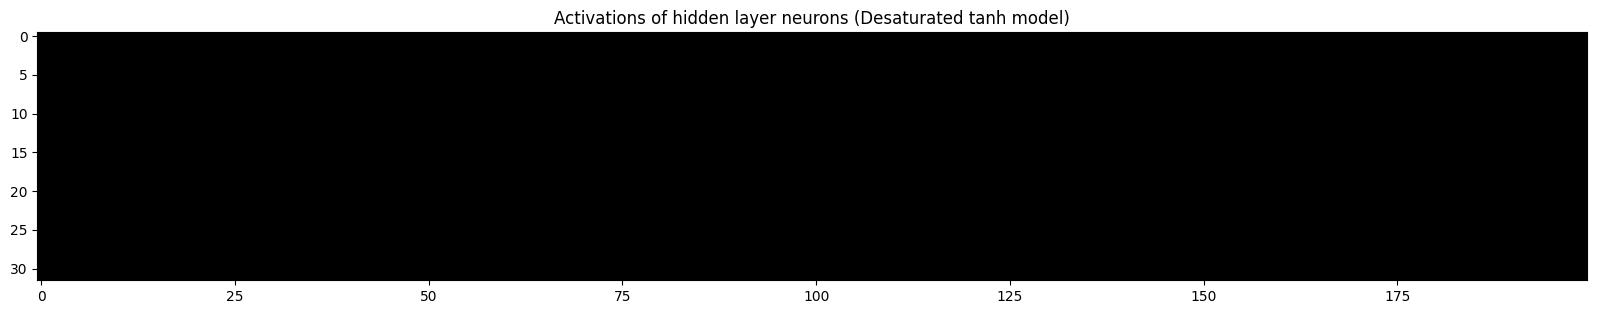

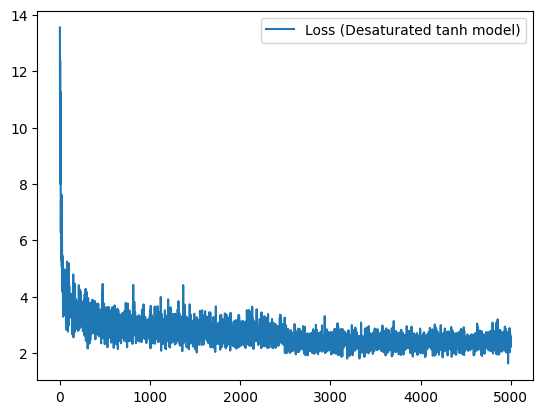

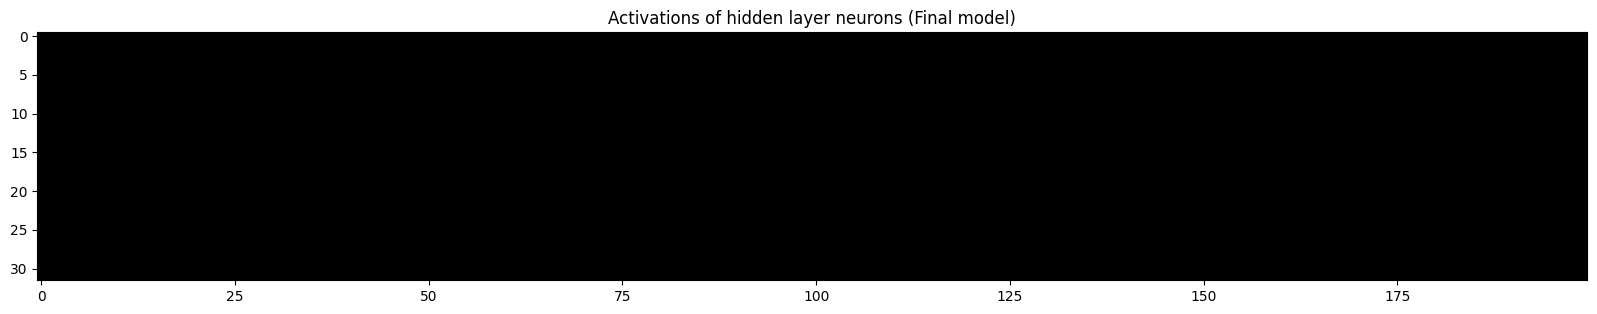

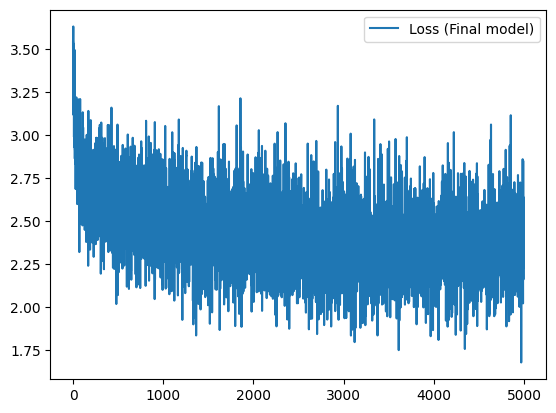

In [3]:
def evaluate_model(model, name, rounds=5000):
    print(f"Training {name}...")

    # Show some visualizations about our initial parameters.
    result = model.forward(td.X_test[:32])
    plt.figure(figsize=(20, 10))
    plt.imshow(result.CXW1.abs() > 0.999, cmap="gray", interpolation="nearest")
    plt.title(f"Activations of hidden layer neurons ({name})")

    # Show some visualizations about our parameters after training.
    model.train(rounds, silent=True)
    plt.figure()
    plt.plot(range(len(model.training_loss)), model.training_loss, label=f"Loss ({name})")
    plt.legend()

    print(f"{name} Loss after {rounds} rounds:", model.calc_loss_for_dataset(td.X_test, td.Y_test))

evaluate_model(MakemoreModel(w1_scale=1, b1_scale=1, w2_scale=1, b2_scale=1), name="Initial model")

evaluate_model(MakemoreModel(w1_scale=1, b1_scale=1, w2_scale=0.1, b2_scale=0), name="Less overconfident model")

evaluate_model(MakemoreModel(w1_scale=0.2, b1_scale=0.01, w2_scale=1, b2_scale=1), name="Desaturated tanh model")

model = MakemoreModel(w1_scale=0.2, b1_scale=0.01, w2_scale=0.1, b2_scale=0.0)

evaluate_model(model, name="Final model")



In [4]:
model.train(rounds=200_000)

print("Final loss over training set:", model.calc_loss_for_dataset(td.X_train, td.Y_train))
print("Final loss over dev set:", model.calc_loss_for_dataset(td.X_dev, td.Y_dev))

      0 /  200000 LR=0.10 minibatch loss: 2.0552
   1000 /  200000 LR=0.10 minibatch loss: 2.4177
   2000 /  200000 LR=0.10 minibatch loss: 2.2858
   3000 /  200000 LR=0.10 minibatch loss: 2.2143
   4000 /  200000 LR=0.10 minibatch loss: 2.1512
   5000 /  200000 LR=0.10 minibatch loss: 2.3825
   6000 /  200000 LR=0.10 minibatch loss: 2.4056
   7000 /  200000 LR=0.10 minibatch loss: 1.9474
   8000 /  200000 LR=0.10 minibatch loss: 2.4176
   9000 /  200000 LR=0.10 minibatch loss: 2.2080
  10000 /  200000 LR=0.10 minibatch loss: 2.0489
  11000 /  200000 LR=0.10 minibatch loss: 2.2659
  12000 /  200000 LR=0.10 minibatch loss: 2.3445
  13000 /  200000 LR=0.10 minibatch loss: 2.2955
  14000 /  200000 LR=0.10 minibatch loss: 1.9219
  15000 /  200000 LR=0.10 minibatch loss: 2.2535
  16000 /  200000 LR=0.10 minibatch loss: 1.8144
  17000 /  200000 LR=0.10 minibatch loss: 2.2944
  18000 /  200000 LR=0.10 minibatch loss: 2.2466
  19000 /  200000 LR=0.10 minibatch loss: 2.1793
  20000 /  200000 LR

In [5]:
for _ in range(10):
    print(model.predict())


aylan
zeba
jagi
analiyah
malsey
livilahjiel
khric
armon
aunzae
fion


In [6]:
for _ in range(10): print(model.predict('atu'))

atuti
aturi
aturi
atulie
atura
aturie
atulji
atul
atuh
atuwaiyen


(array([1375.,  289.,  265.,  271.,  842.,  985.,  285.,  291.,  293.,
        1504.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

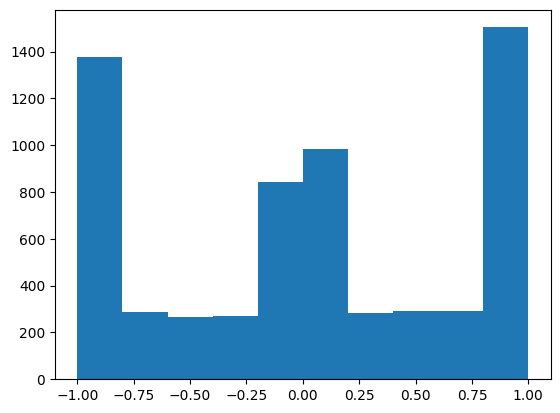

In [7]:
from lecture3.training_data import X_train

result = model.forward(X_train[:32])

plt.hist(result.CXW1.view(-1).tolist())

(array([  8.,  27.,  31., 124., 227., 211., 132.,  60.,  29.,  15.]),
 array([-6.68389988, -5.36459336, -4.04528685, -2.72598033, -1.40667381,
        -0.0873673 ,  1.23193922,  2.55124574,  3.87055225,  5.18985877,
         6.50916529]),
 <BarContainer object of 10 artists>)

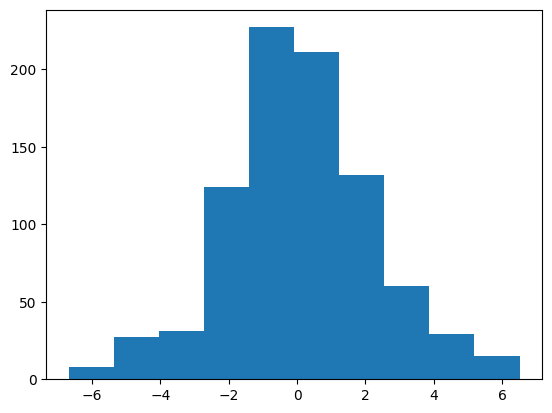

In [8]:
plt.hist(result.logits.view(-1).tolist())

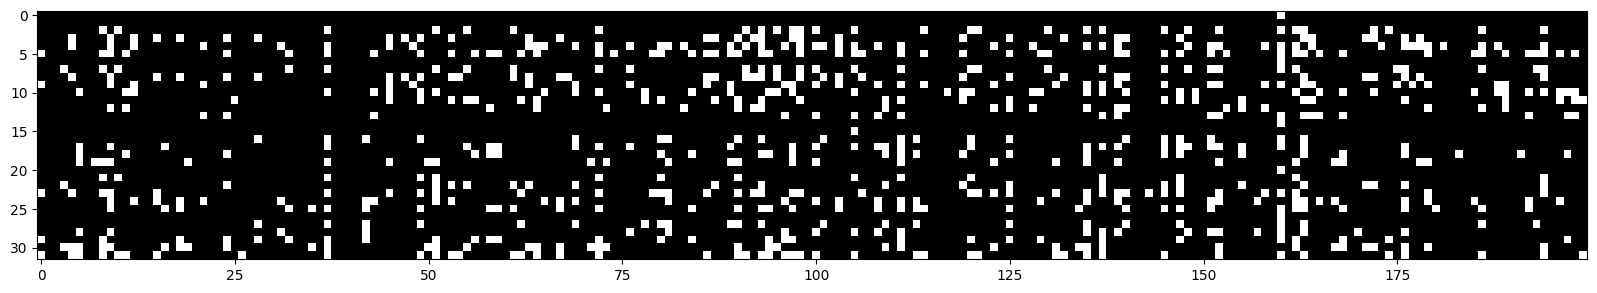

In [9]:
plt.figure(figsize=(20, 10))
plt.imshow(result.CXW1.abs() > 0.999, cmap="gray", interpolation="nearest")